In [1]:
import utils.scatter_tools as scatter_tools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = r"f0_array_files/trio_f0_array.txt"
f0_array = np.sort(np.concatenate(np.loadtxt(file_name, delimiter=",")))
n_tones = f0_array.size

idc_qr = 7.78e4
idc_fab_yield = 0.91

ppcaps_qr = 4.30e4
ppcaps_fab_yield = 0.89

repeats = 10000
line_width_spacing_threshold = 10

fractional_frequency_shift_quantity = 100
fractional_frequency_shift_array = np.logspace(start=-5, stop=-2, num=fractional_frequency_shift_quantity)

In [3]:
idc_full_clash_array = np.empty(shape=(fractional_frequency_shift_quantity, repeats), dtype=np.ndarray)
ppcaps_full_clash_array = np.empty(shape=(fractional_frequency_shift_quantity, repeats), dtype=np.ndarray)

for count, fractional_frequency_shift in enumerate(fractional_frequency_shift_array):

    idc_current_clash_array = scatter_tools.get_clash_number_array(
        f0_array=f0_array,
        fab_yield=idc_fab_yield,
        fractional_frequency_shift=fractional_frequency_shift,
        qr=idc_qr,
        line_width_spacing_clash_threshold=line_width_spacing_threshold,
        repeats=repeats,
        plot_density_histogram=False,
    )
    idc_full_clash_array[count] = idc_current_clash_array

    ppcaps_current_clash_array = scatter_tools.get_clash_number_array(
        f0_array=f0_array,
        fab_yield=ppcaps_fab_yield,
        fractional_frequency_shift=fractional_frequency_shift,
        qr=ppcaps_qr,
        line_width_spacing_clash_threshold=line_width_spacing_threshold,
        repeats=repeats,
        plot_density_histogram=False,
    )

    ppcaps_full_clash_array[count] = ppcaps_current_clash_array

    print(f"Variation {count} complete")


Variation 0 complete
Variation 1 complete
Variation 2 complete
Variation 3 complete
Variation 4 complete
Variation 5 complete
Variation 6 complete
Variation 7 complete
Variation 8 complete
Variation 9 complete
Variation 10 complete
Variation 11 complete
Variation 12 complete
Variation 13 complete
Variation 14 complete
Variation 15 complete
Variation 16 complete
Variation 17 complete
Variation 18 complete
Variation 19 complete
Variation 20 complete
Variation 21 complete
Variation 22 complete
Variation 23 complete
Variation 24 complete
Variation 25 complete
Variation 26 complete
Variation 27 complete
Variation 28 complete
Variation 29 complete
Variation 30 complete
Variation 31 complete
Variation 32 complete
Variation 33 complete
Variation 34 complete
Variation 35 complete
Variation 36 complete
Variation 37 complete
Variation 38 complete
Variation 39 complete
Variation 40 complete
Variation 41 complete
Variation 42 complete
Variation 43 complete
Variation 44 complete
Variation 45 complet

In [4]:
idc_most_common_clash_array = scatter_tools.get_most_common_clash_count(idc_full_clash_array)
ppcaps_most_common_clash_array = scatter_tools.get_most_common_clash_count(ppcaps_full_clash_array)



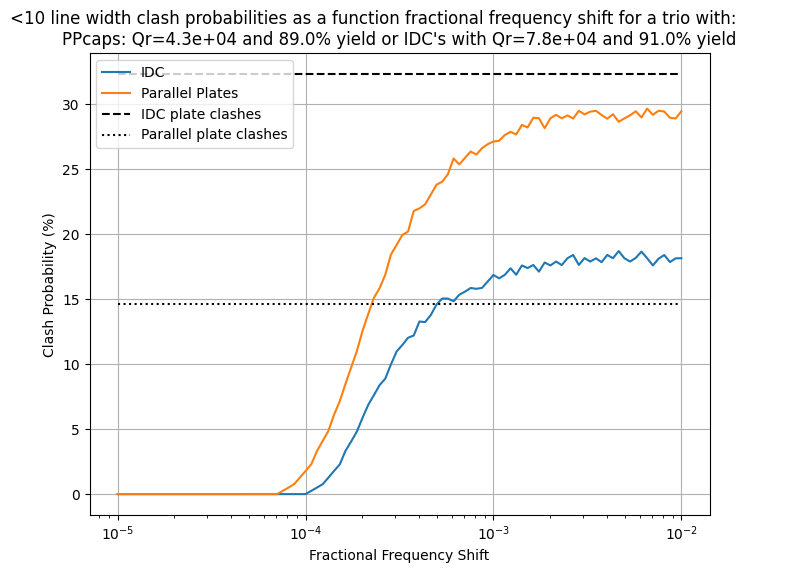

In [5]:
plt.figure(figsize=(8,6))
plt.plot(fractional_frequency_shift_array, (idc_most_common_clash_array / n_tones) * 100, label="IDC")
plt.plot(fractional_frequency_shift_array, (ppcaps_most_common_clash_array / n_tones) * 100, label="Parallel Plates")
plt.hlines(y=(126/n_tones) * 100, xmin=1e-5, xmax=1e-2, linestyle="--", color="k", label="IDC plate clashes")
plt.hlines(y=(57/n_tones) * 100, xmin=1e-5, xmax=1e-2, linestyle=":", color="k", label="Parallel plate clashes")
plt.xlabel("Fractional Frequency Shift")
plt.ylabel("Clash Probability (%)")
plt.legend()
plt.title(f"<{line_width_spacing_threshold} line width clash probabilities as a function fractional frequency shift for a trio with:\
          \nPPcaps: Qr={ppcaps_qr:.1e} and {ppcaps_fab_yield*100}% yield or IDC's with Qr={idc_qr:.1e} and {idc_fab_yield*100}% yield")
plt.grid()
plt.xscale("log")
# plt.yscale("log")
plt.show()